In [22]:
import pandas as pd
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import os 
os.environ['PROJ_LIB'] = '/Users/chenzizhang/anaconda3/pkgs/proj4-5.2.0-h6de7cb9_1006/share/proj/'
from mpl_toolkits.basemap import Basemap 
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv("/Users/chenzizhang/Data Science/data/raw/vehicles.csv")

In [8]:
df = df.drop('county', axis =1)

In [73]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long'],
      dtype='object')

The dataset contains so many columns, here I chose some of the columns I insterested for exploratory data analysis.

# 1. Plot 2D map -- Location

Here I used "lat" and "long" columns to show the location of adverts on the U.S. map. Basemap package is used to plot 2D maps. 

Considering the large size of whole dataset, I selected 20000 samples from it to draw the map.

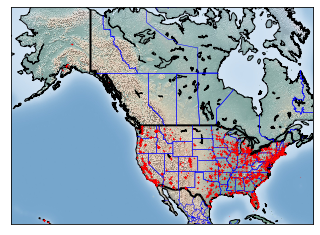

In [16]:
# Reference: https://www.kaggle.com/paulinan/usa-used-cars-market-analysis
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
df_sub = df.sample(20000)
Map = Basemap(projection='merc', # mercator projection
            llcrnrlat = 20,
            llcrnrlon = -170,
            urcrnrlat = 70,
            urcrnrlon = -60,
            resolution='l')

Map.shadedrelief()
Map.drawcoastlines() # drawing coaslines
Map.drawcountries(linewidth=2) # drawing countries boundaries
Map.drawstates(color='b') # drawing states boundaries
#m.fillcontinents(color='grey',lake_color='aqua')

for index, row in df_sub.iterrows():
    latitude = row['lat']
    longitude = row['long']
    x_coor, y_coor = Map(longitude, latitude)
    Map.plot(x_coor,y_coor,'.',markersize=0.2,c="red")

As we can see from the map, the location of adverts concentrated in <span style="color:blue"> Eastern United States. </span>

# 2. Manufacturing Year Influence on Used Car Price

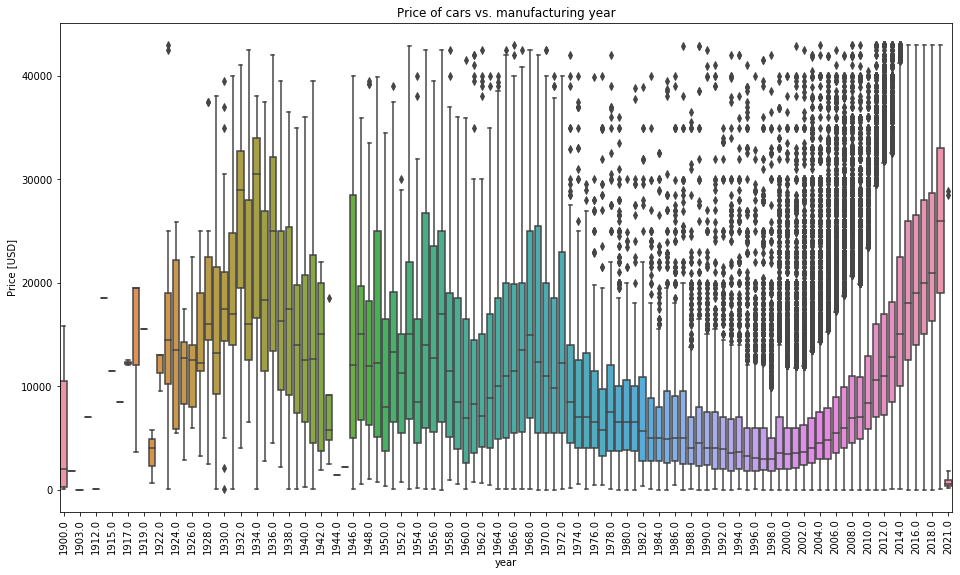

In [27]:
#identifying outliers:
price_over_98pct = df["price"].quantile(.98)

price_yr_cleaned = df[(1 < df["price"]) & (df["price"] < price_over_98pct) & (df["year"] != 0) & (df["year"] != 2020)]

plt.figure(figsize=(16,9))
sns.boxplot(x="year", y="price", data = price_yr_cleaned)
plt.title("Price of cars vs. manufacturing year")
plt.ylabel("Price [USD]")

max_year = price_yr_cleaned["year"].max()
min_year = price_yr_cleaned["year"].min()
steps = 2
lab = np.sort(price_yr_cleaned["year"].unique())[::2]
pos = np.arange(0,111,2)

plt.xticks(ticks=pos, labels=lab, rotation=90)
plt.show()

It can be observed that the car’s year of manufacture has a significant impact on its price. The whole curve is inward. As we can see, <span style="color:blue"> the cars manufactured in 80s and 90s have the lowest prices, while the cars manufactured after 2015 or before 1939 have the highest prices. </span>

# 3. Top 20 Popular Manufacturers

In [46]:
manufacturers = df["manufacturer"].value_counts()
Top_20 = manufacturers[:20]

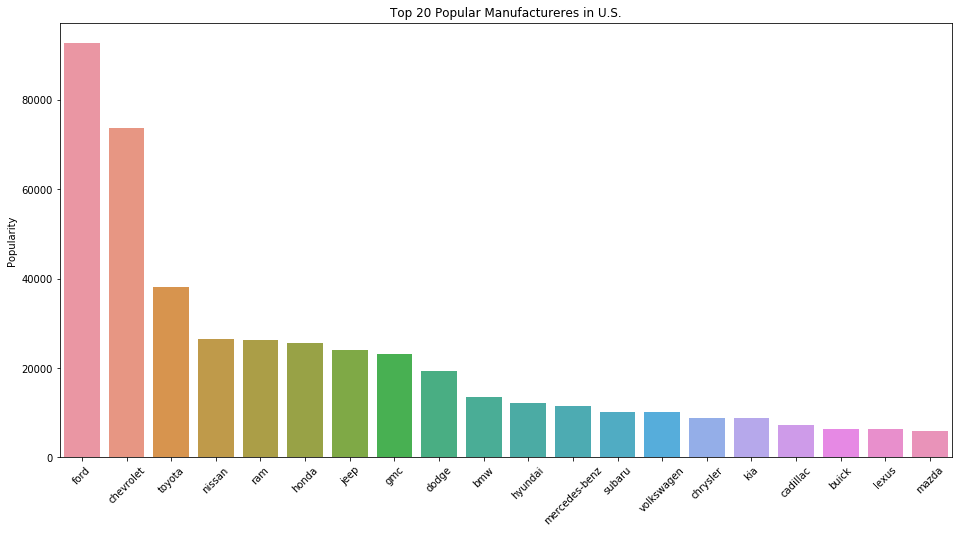

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(x=Top_20.index, y=Top_20.values)
plt.title("Top 20 Popular Manufactureres in U.S.")
plt.ylabel("Popularity")
ax = plt.gca()
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.show()

As we can see, <span style="color:blue"> the top 5 popular manufacturers are ford, chevrolet, toyota, nissan, ram. </span>

# 4. Top 5 Popular Car Colors

In [45]:
color = df['paint_color'].value_counts()
Top_5 = color[:5]

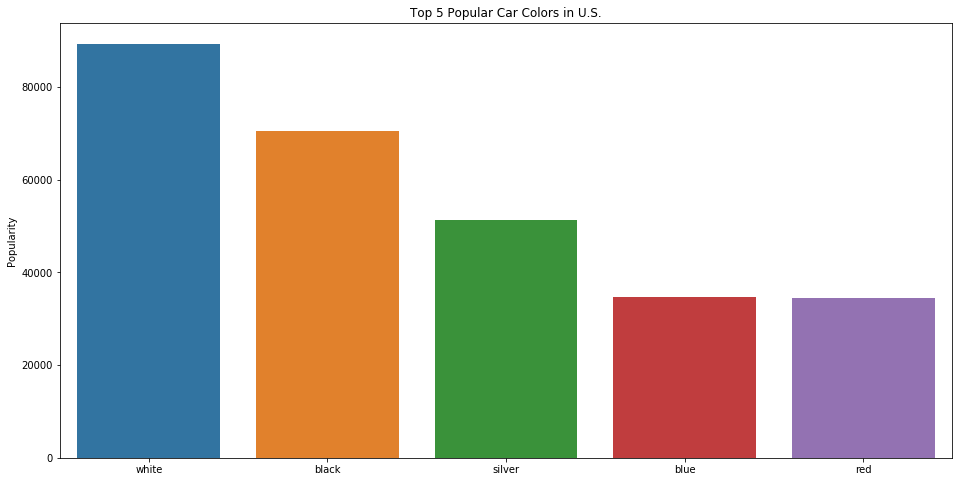

In [47]:
plt.figure(figsize=(16,8))
sns.barplot(x=Top_5.index, y=Top_5.values)
plt.title("Top 5 Popular Car Colors in U.S.")
plt.ylabel("Popularity")
plt.show()

As we can see, <span style="color:blue"> the top 5 popular car colors are white, black, silver, blue, red. </span>

# 5. Printed Colors Influence on Car price

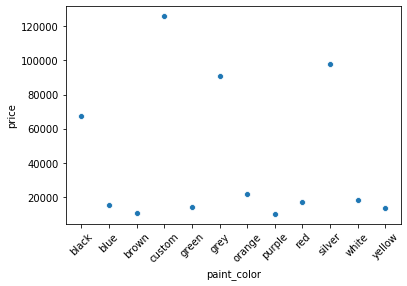

In [71]:
df_1 = df.groupby('paint_color')['price'].mean()
df_1.sort_values(ascending=False)
df_1 = pd.DataFrame(df_1)
sns.scatterplot(x=df_1.index, y=df_1['price'])
ax = plt.gca()
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

As we can see, <span style="color:blue"> used cars with color customed has the higest price. Used cars with brown, purple color has less competitive power in price market. </span> 

# 6. odometer length Influence on Car Price

In [77]:
# eliminate outliers
cars_odo = df[(df["odometer"] < df["odometer"].quantile(.99)) 
                      & ((df["price"] < df["price"].quantile(.99)))& ((df["price"]>1))]

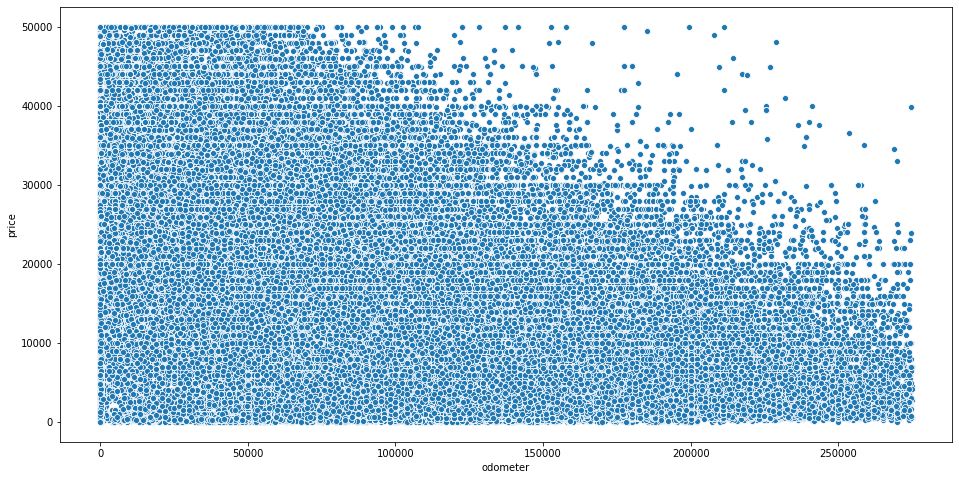

In [78]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'odometer', y = 'price', data = cars_odo)
plt.show()

As we can see, <span style="color:blue"> it is harder for used cars with longer odometer length to have higher price. </span> 